# Mounting google drive in colab

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing important libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import seaborn as sns #visualisation library
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
import plotly.graph_objects as go


# Let's read & explore Amestrdam's data

In [ ]:
# to get the listings.csv.gz file
df=pd.read_csv('/content/drive/MyDrive/Amsterdam - Netherlands/listings.csv.gz', compression='gzip', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df #displaying the data

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20211205213126,2021-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
1,20168,https://www.airbnb.com/rooms/20168,20211205213126,2021-12-06,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,3.53
2,27886,https://www.airbnb.com/rooms/27886,20211205213126,2021-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.92,4.90,4.80,0363 974D 4986 7411 88D8,t,1,0,1,0,2.11
3,28871,https://www.airbnb.com/rooms/28871,20211205213126,2021-12-06,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.63
4,29051,https://www.airbnb.com/rooms/29051,20211205213126,2021-12-06,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,4.91,4.86,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,5.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,53661558,https://www.airbnb.com/rooms/53661558,20211205213126,2021-12-06,apartment center Amsterdam,Relaxe neste espaço calmo e cheio de estilo.<b...,NaN,https://a0.muscache.com/pictures/d530d918-a501...,434282364,https://www.airbnb.com/users/show/434282364,...,NaN,NaN,NaN,Exempt,t,1,1,0,0,NaN
5552,53668495,https://www.airbnb.com/rooms/53668495,20211205213126,2021-12-06,Full flat with garden for families near Wester...,Our flat is located just in front of the Weste...,NaN,https://a0.muscache.com/pictures/291c44f3-99fb...,11768620,https://www.airbnb.com/users/show/11768620,...,NaN,NaN,NaN,0363 C724 A106 AE99 0B0B,t,1,1,0,0,NaN
5553,53669920,https://www.airbnb.com/rooms/53669920,20211205213126,2021-12-06,Ground Floor of a 200 Year Old Canal House,Centrally located canal house with modern faci...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,434634113,https://www.airbnb.com/users/show/434634113,...,NaN,NaN,NaN,0363 8553 5196 A6A0 2A7F,f,1,0,1,0,NaN
5554,53670575,https://www.airbnb.com/rooms/53670575,20211205213126,2021-12-06,Bright and cozy apartment in Amsterdam,Welcome to my apartment located in West Amster...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,172920739,https://www.airbnb.com/users/show/172920739,...,NaN,NaN,NaN,0363 4E2B 7976 261A FF95,f,1,1,0,0,NaN


# Data Exploration & cleaning For the listings data

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20211205213126,2021-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
1,20168,https://www.airbnb.com/rooms/20168,20211205213126,2021-12-06,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,3.53
2,27886,https://www.airbnb.com/rooms/27886,20211205213126,2021-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.92,4.90,4.80,0363 974D 4986 7411 88D8,t,1,0,1,0,2.11
3,28871,https://www.airbnb.com/rooms/28871,20211205213126,2021-12-06,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.63
4,29051,https://www.airbnb.com/rooms/29051,20211205213126,2021-12-06,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,4.91,4.86,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,5.57


In [ ]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*df.shape))

# and duplicates
print("It contains {} duplicates.".format(df.duplicated().sum()))

The dataset has 5556 rows and 74 columns.
It contains 0 duplicates.


In [ ]:
df.info() # to get a concise summary of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5556 non-null   int64  
 1   listing_url                                   5556 non-null   object 
 2   scrape_id                                     5556 non-null   int64  
 3   last_scraped                                  5556 non-null   object 
 4   name                                          5556 non-null   object 
 5   description                                   5545 non-null   object 
 6   neighborhood_overview                         3971 non-null   object 
 7   picture_url                                   5556 non-null   object 
 8   host_id                                       5556 non-null   int64  
 9   host_url                                      5556 non-null   o

In [ ]:
df.describe() #summary statistics

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.556000e+03,5.556000e+03,5.556000e+03,5556.000000,5556.000000,0.0,5556.000000,5556.000000,5556.000000,0.0,...,5033.000000,5034.000000,5034.000000,5034.000000,5034.000000,5556.000000,5556.000000,5556.000000,5556.000000,5044.000000
mean,2.584022e+07,2.021121e+13,8.905295e+07,2.548056,2.548056,NaN,52.367131,4.891413,2.955004,NaN,...,4.752221,4.873059,4.880840,4.781172,4.640969,2.181066,1.116631,0.929806,0.018359,1.412659
std,1.668561e+07,1.187607e+00,1.156927e+08,14.358770,14.358770,NaN,0.017001,0.036295,1.460722,NaN,...,0.321210,0.246774,0.250826,0.248882,0.306860,3.158970,2.020526,2.316948,0.224562,2.583281
min,2.818000e+03,2.021121e+13,3.159000e+03,0.000000,0.000000,NaN,52.290340,4.753510,0.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.145910e+07,2.021121e+13,8.913168e+06,1.000000,1.000000,NaN,52.356640,4.869447,2.000000,NaN,...,4.660000,4.850000,4.860000,4.670000,4.530000,1.000000,0.000000,0.000000,0.000000,0.310000
50%,2.447196e+07,2.021121e+13,3.020259e+07,1.000000,1.000000,NaN,52.366705,4.888665,2.000000,NaN,...,4.850000,4.950000,4.960000,4.840000,4.680000,1.000000,1.000000,0.000000,0.000000,0.670000
75%,4.066975e+07,2.021121e+13,1.337386e+08,2.000000,2.000000,NaN,52.376622,4.908602,4.000000,NaN,...,4.970000,5.000000,5.000000,4.970000,4.810000,2.000000,1.000000,1.000000,0.000000,1.670000
max,5.367158e+07,2.021121e+13,4.346341e+08,718.000000,718.000000,NaN,52.425120,5.026430,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,22.000000,21.000000,4.000000,95.890000


In [ ]:
df.corr() #to find the pairwise correlation of all columns in the dataframe

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000,NaN,0.529499,0.029372,0.029372,NaN,0.003376,-0.024359,-0.027904,NaN,...,-0.088180,-0.098029,-0.122321,0.057329,-0.043234,0.192939,0.103726,0.151289,0.057082,0.099432
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.529499,NaN,1.000000,0.041613,0.041613,NaN,-0.009486,-0.007176,-0.019447,NaN,...,-0.155246,-0.172374,-0.224837,-0.046154,-0.160037,0.311118,0.091654,0.284625,0.089078,0.194393
host_listings_count,0.029372,NaN,0.041613,1.000000,1.000000,NaN,0.005640,-0.004466,-0.017981,NaN,...,-0.065874,-0.063923,-0.070234,-0.017404,-0.074607,0.212858,0.146069,0.122234,0.019546,0.064958
host_total_listings_count,0.029372,NaN,0.041613,1.000000,1.000000,NaN,0.005640,-0.004466,-0.017981,NaN,...,-0.065874,-0.063923,-0.070234,-0.017404,-0.074607,0.212858,0.146069,0.122234,0.019546,0.064958
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.003376,NaN,-0.009486,0.005640,0.005640,NaN,1.000000,-0.111768,0.056657,NaN,...,0.000997,0.005220,-0.002200,0.008441,-0.013922,0.049438,0.029319,0.025643,0.038165,-0.000229
longitude,-0.024359,NaN,-0.007176,-0.004466,-0.004466,NaN,-0.111768,1.000000,0.102054,NaN,...,-0.014950,0.002803,0.021123,-0.011089,0.027412,0.000216,-0.027816,0.010378,0.020972,-0.051680
accommodates,-0.027904,NaN,-0.019447,-0.017981,-0.017981,NaN,0.056657,0.102054,1.000000,NaN,...,-0.063353,-0.010398,-0.002909,-0.086944,-0.050513,-0.025699,0.126815,-0.107793,-0.032604,-0.076322
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


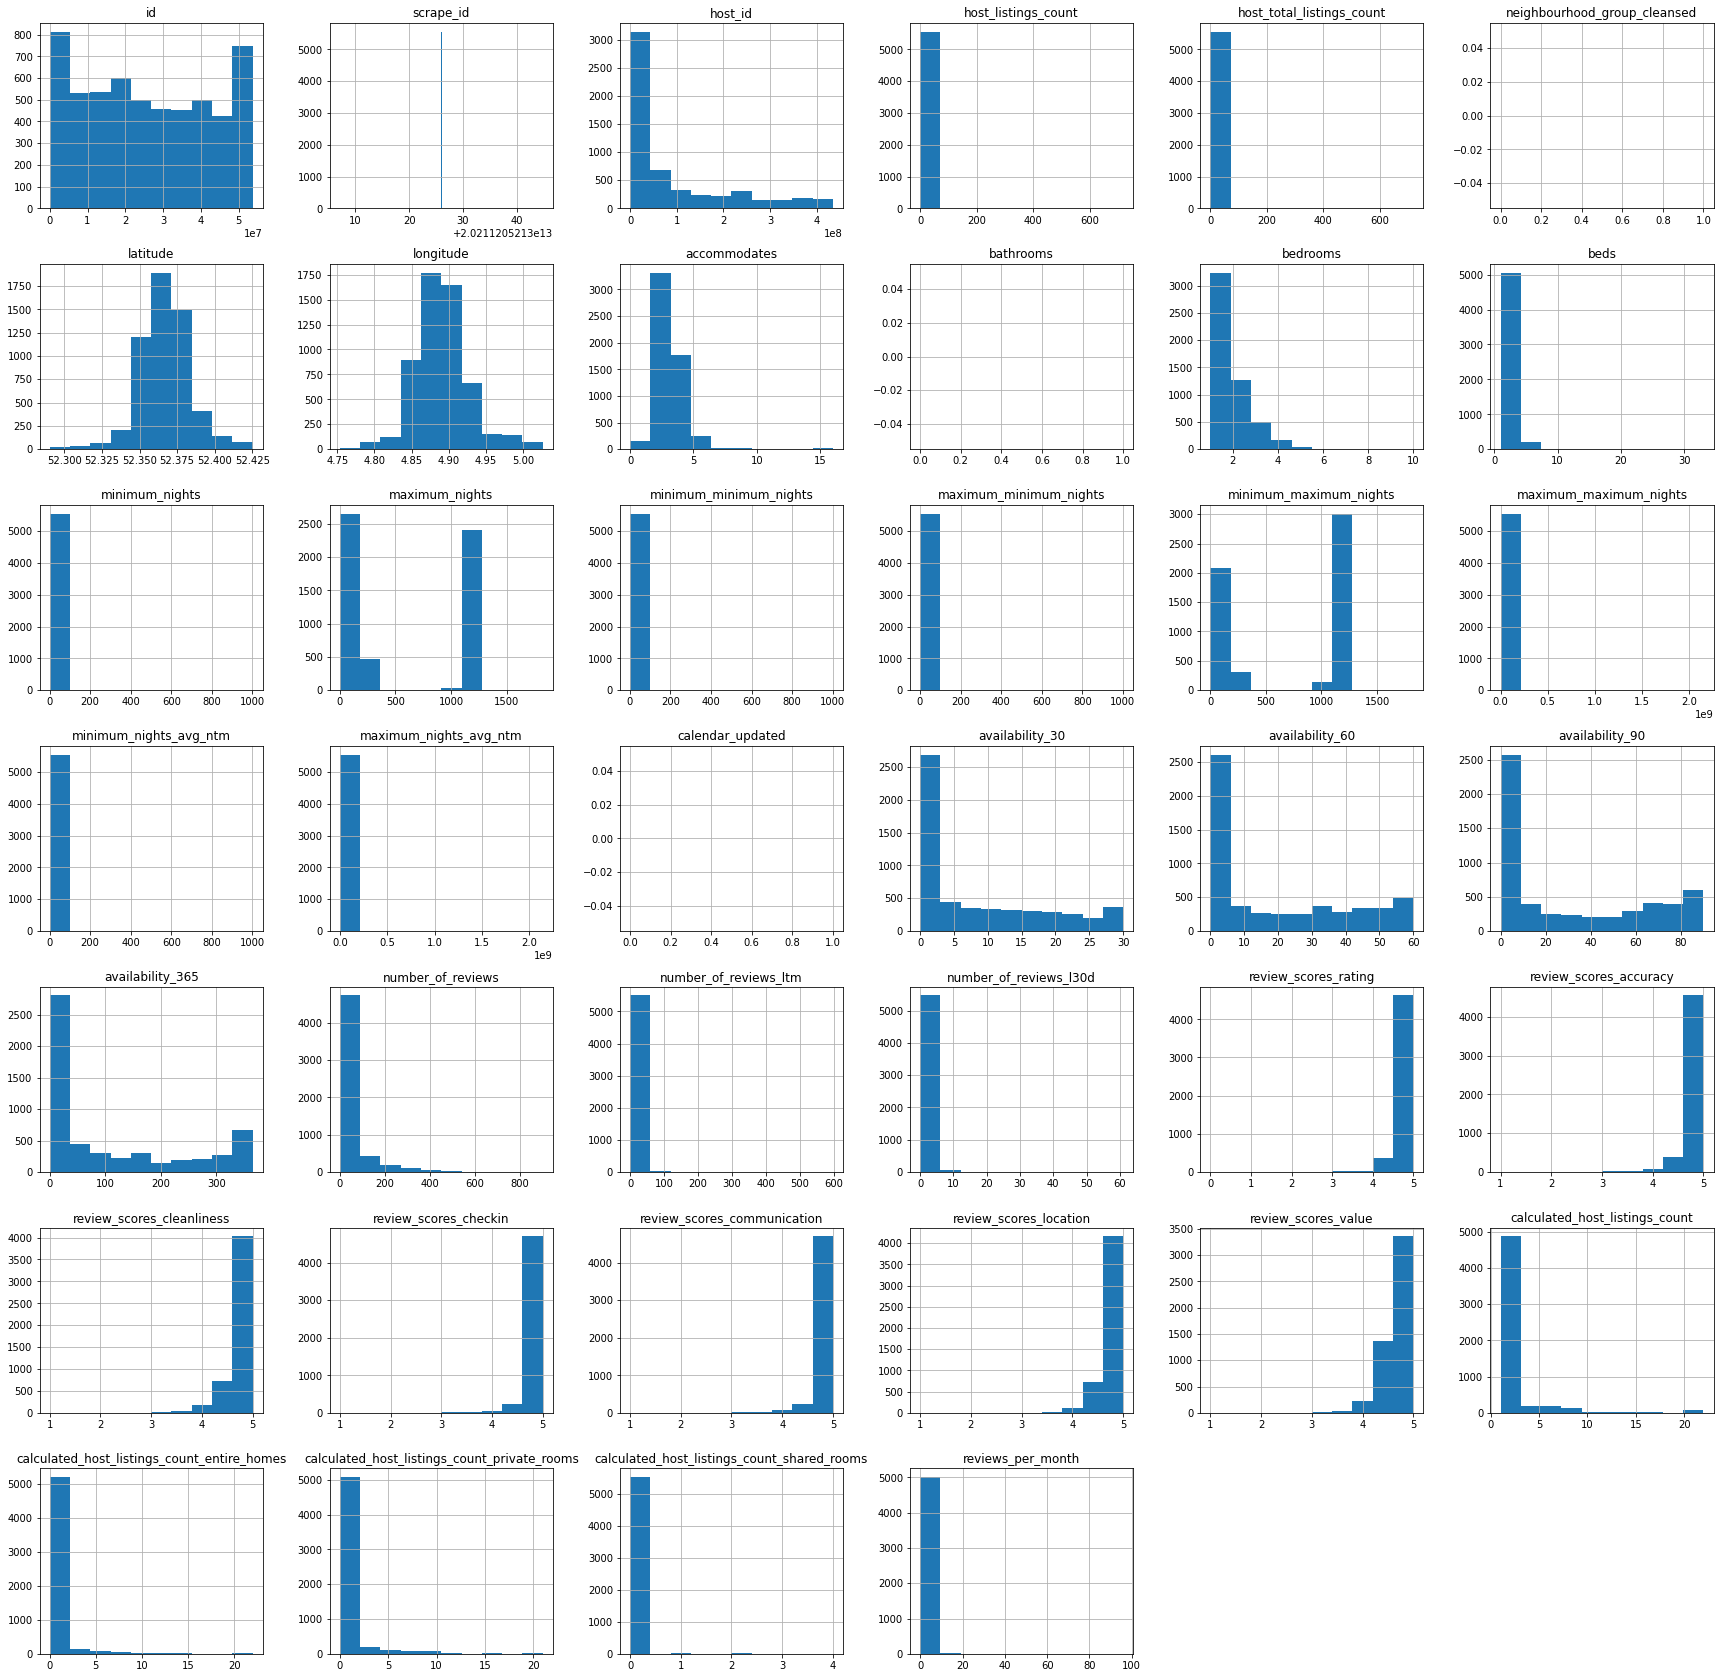

In [ ]:
df.hist(figsize= (30,30))
plt.show() #to make a histogram of the DataFrame

In [ ]:
df.isna().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
name                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               512
Length: 74, dtype: int64

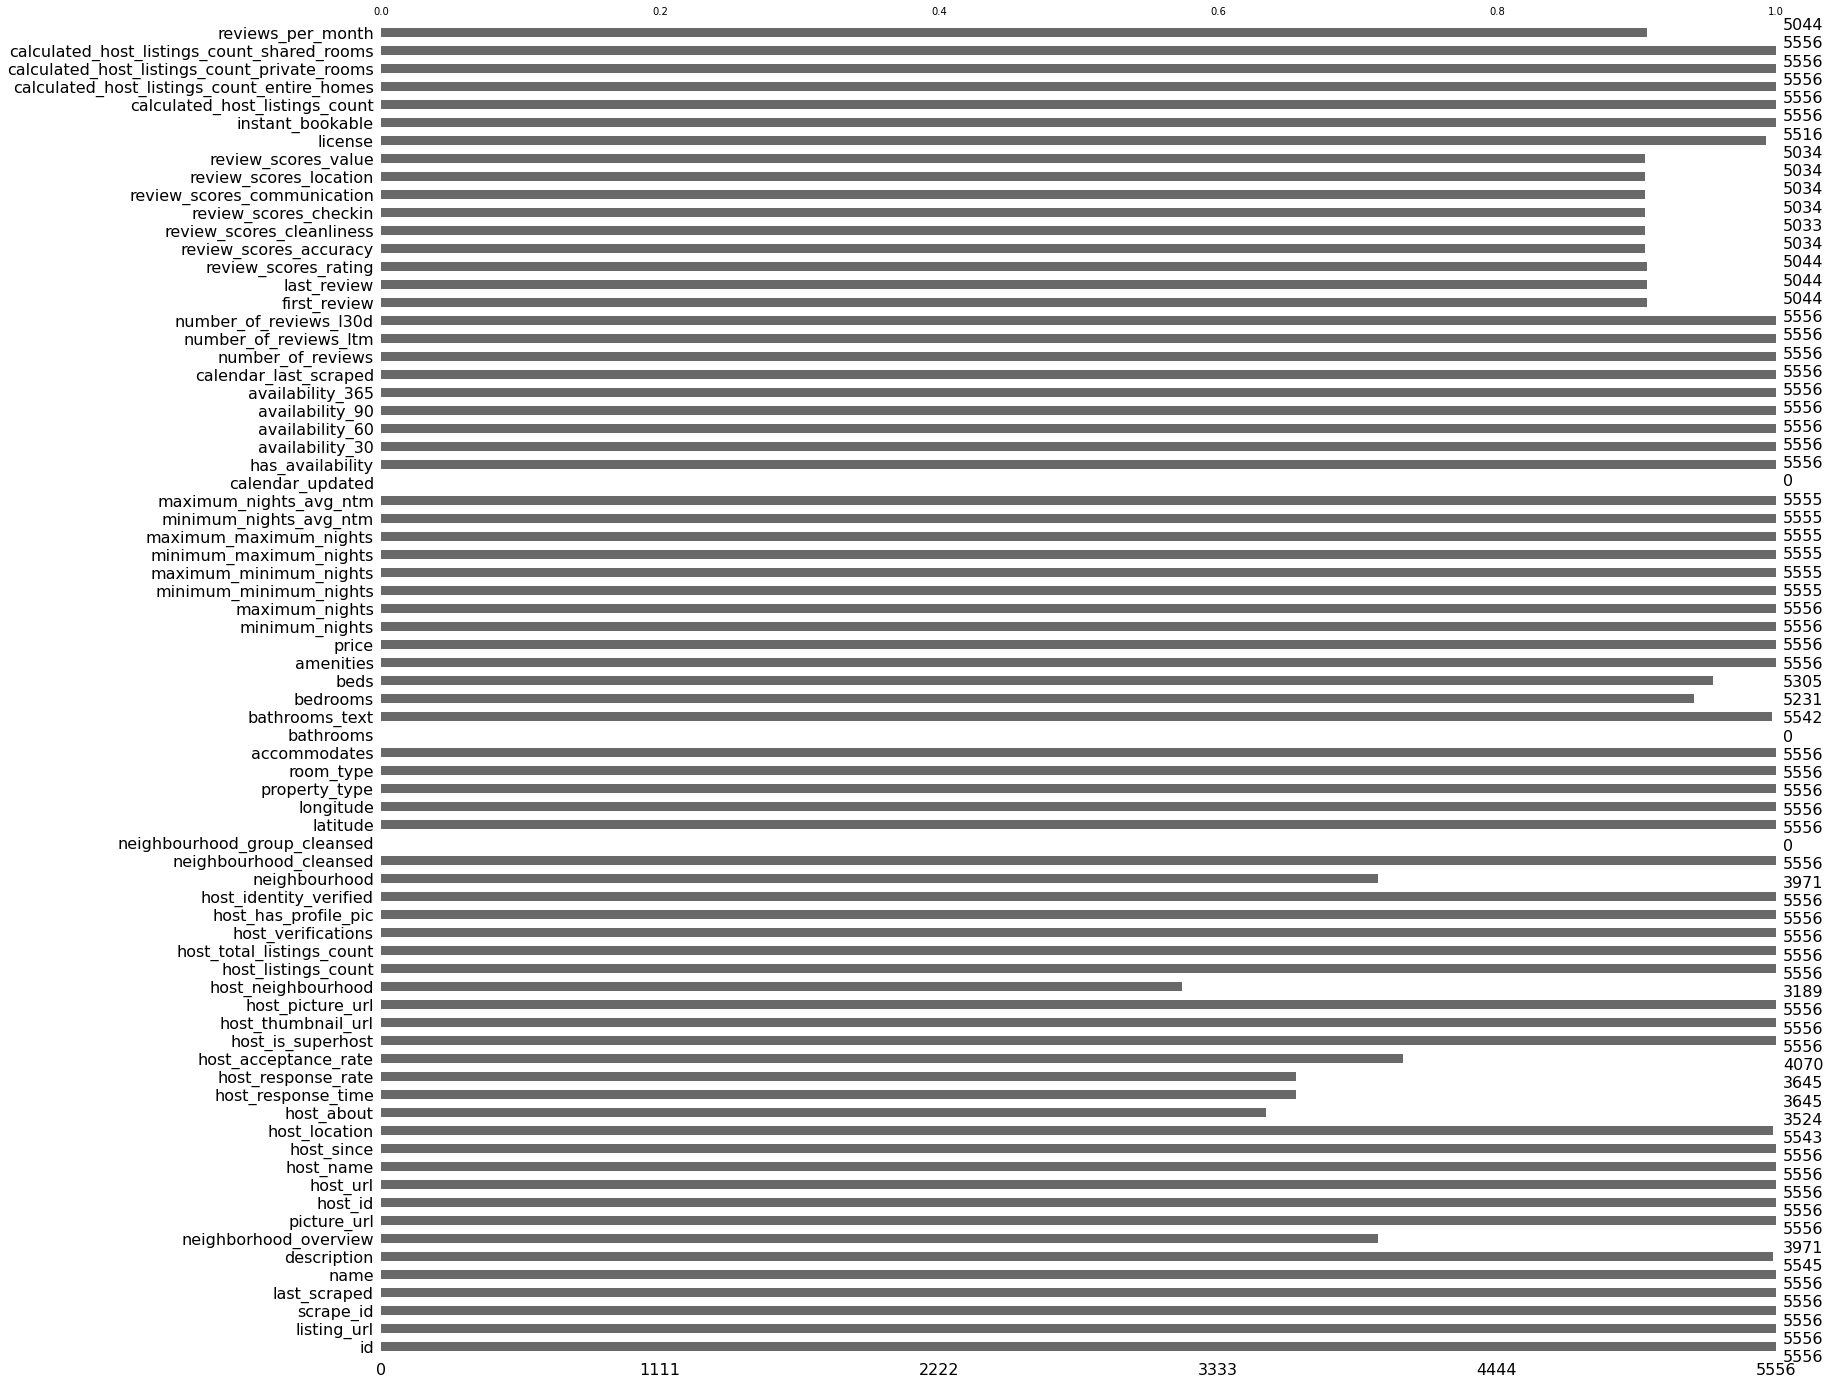

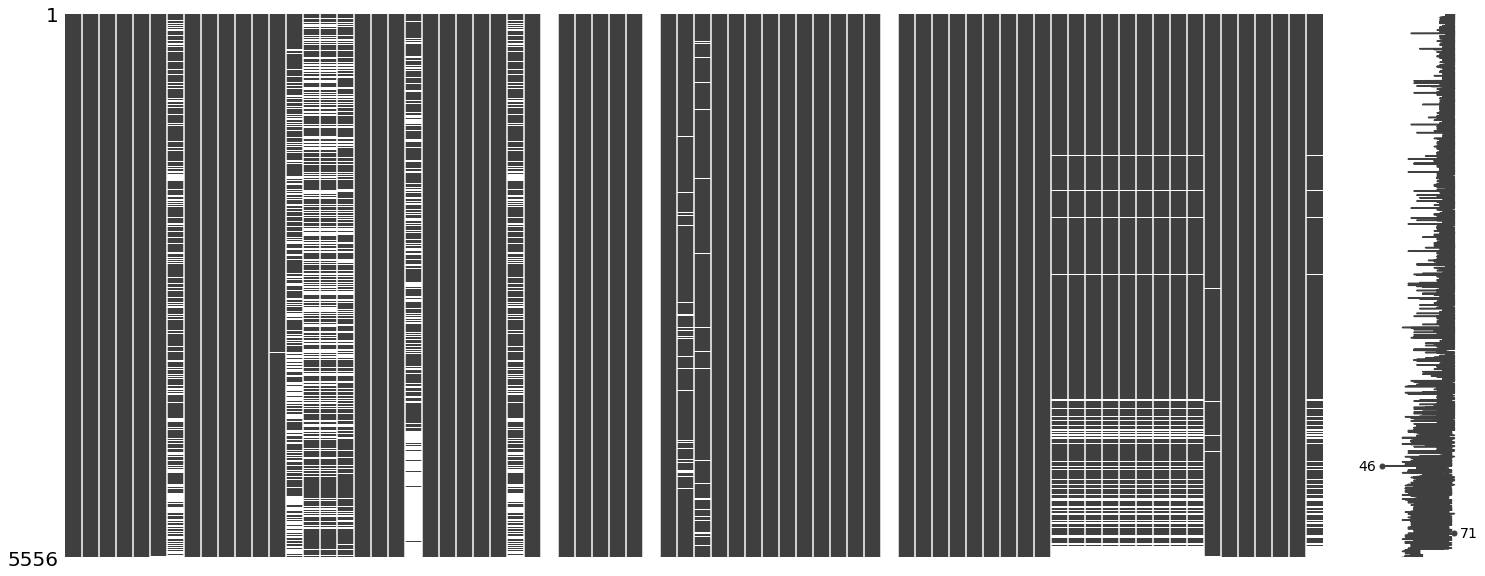

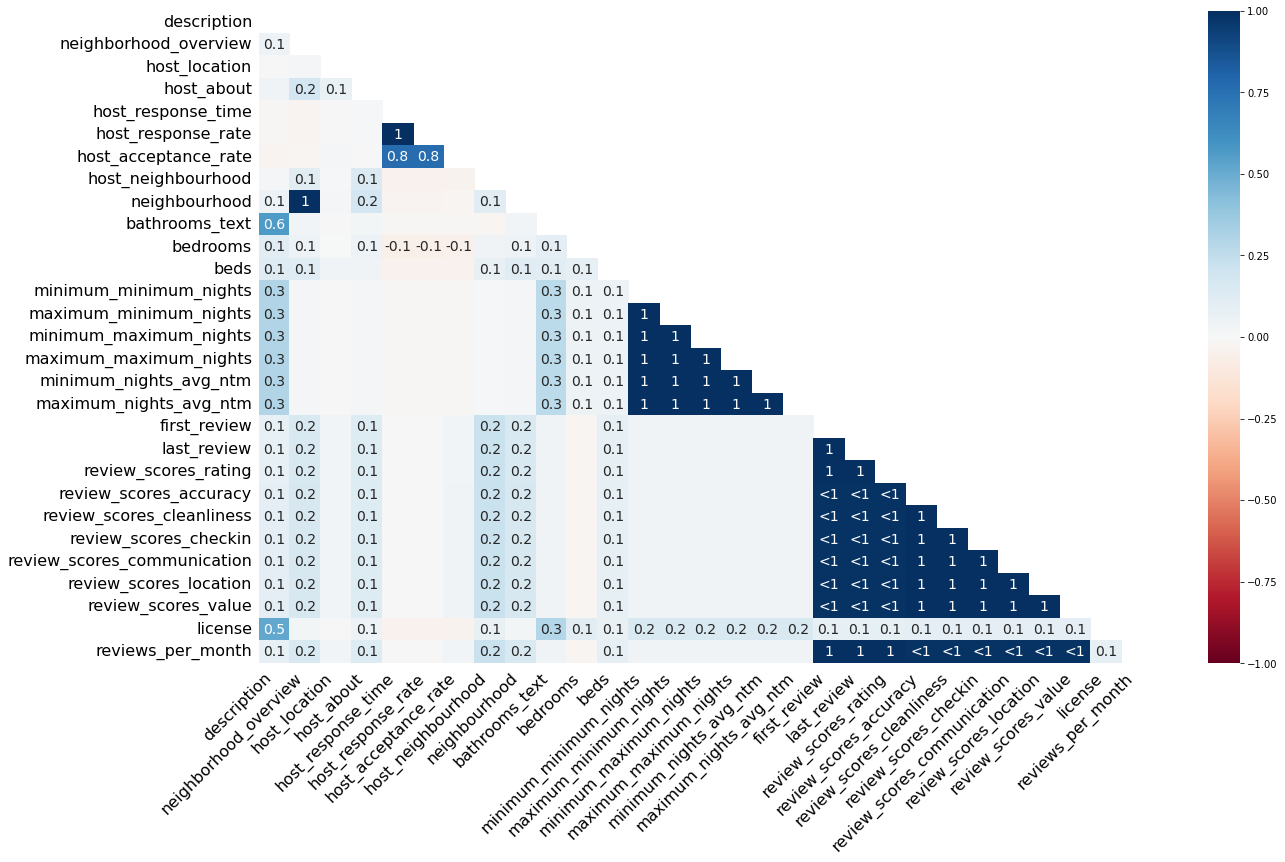

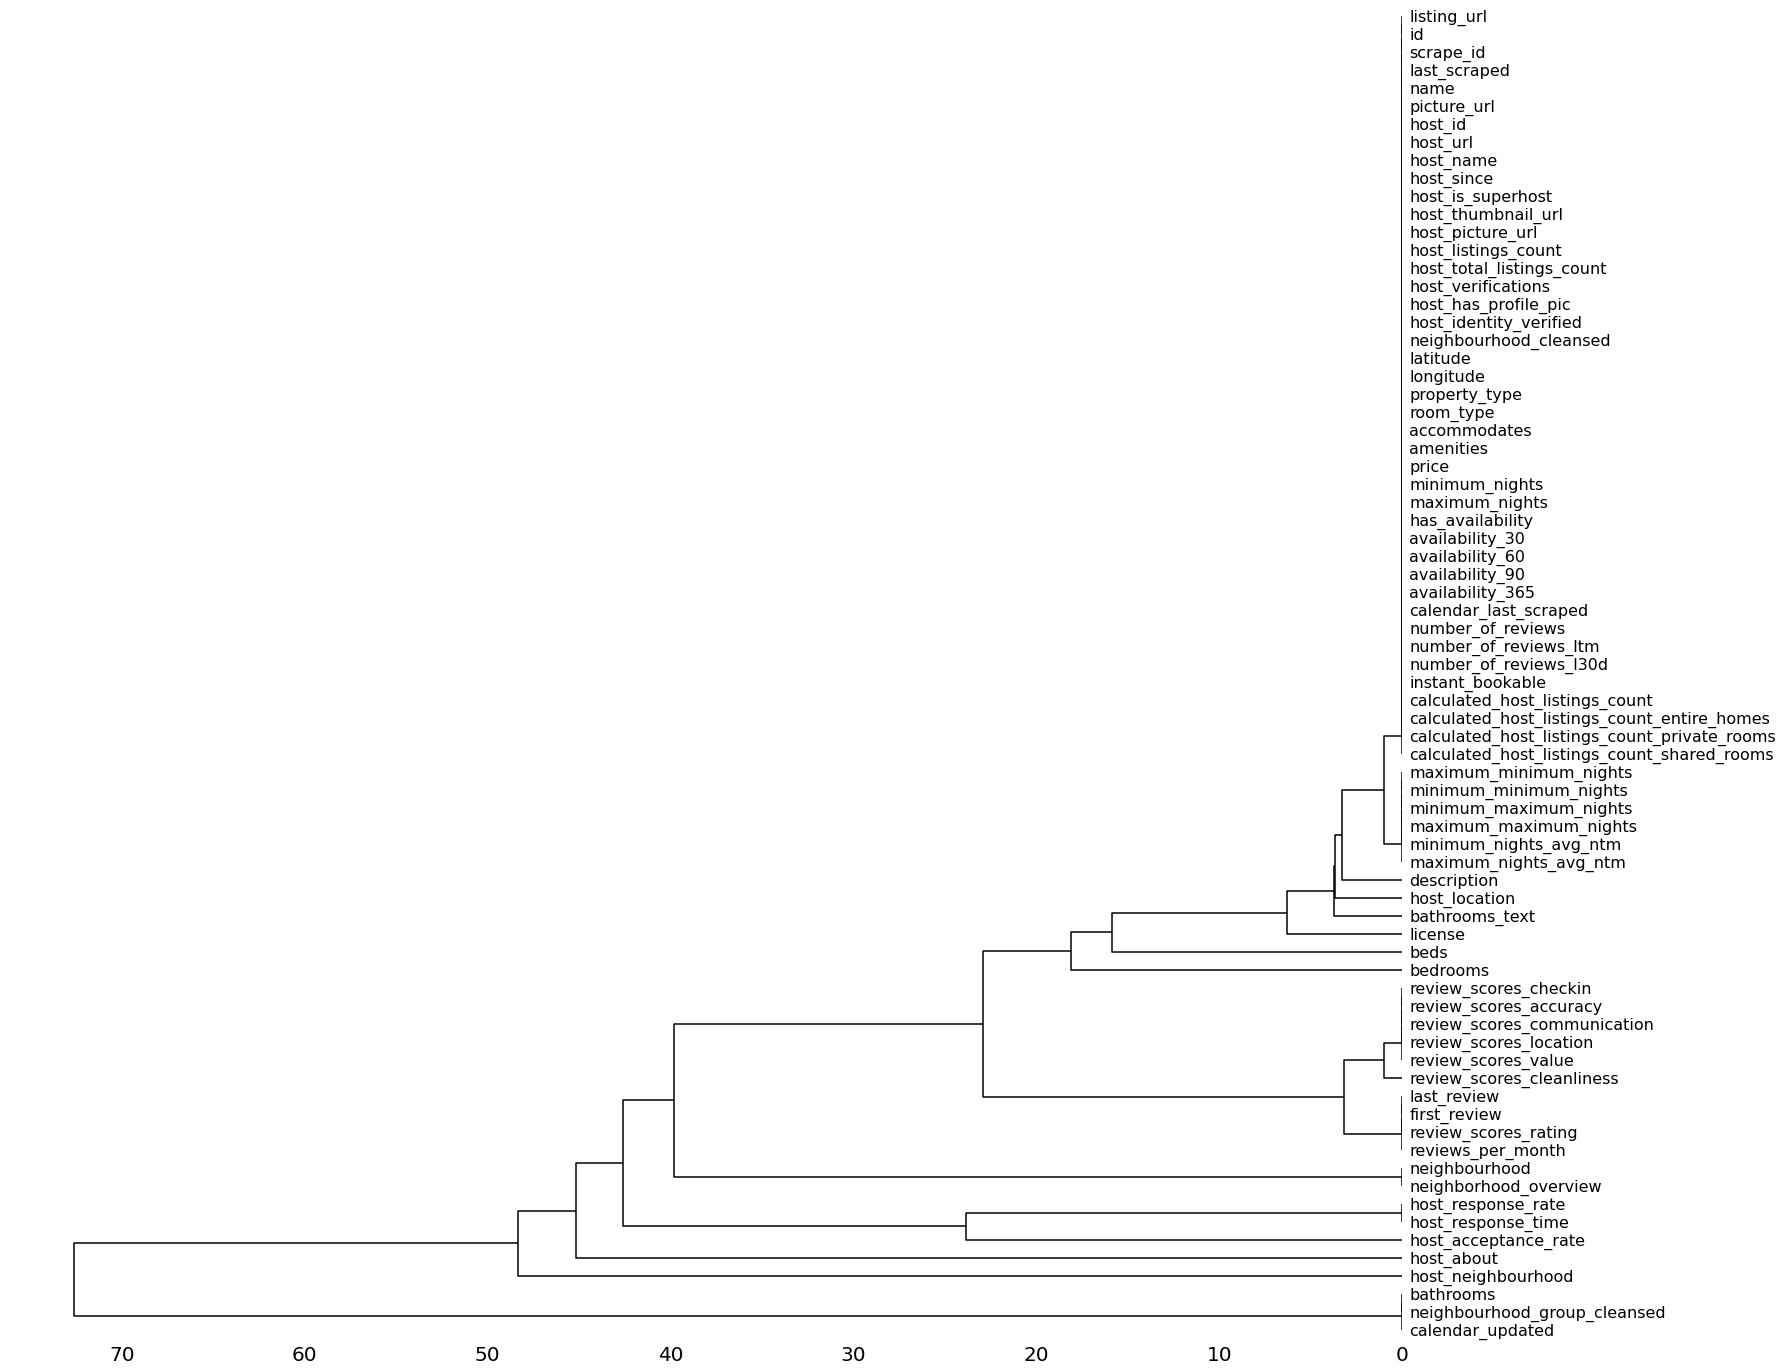

In [ ]:
#analyzing missing data
#bar chart
msno.bar(df)

#visualize missing values as a matrix
msno.matrix(df)

#heapmap for correlation analysis
msno.heatmap(df)

#dendrogram plot
msno.dendrogram(df)

In [ ]:
# count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False).head(6)

,Total missing,% missing
neighbourhood_group_cleansed,5556,100.000000
bathrooms,5556,100.000000
calendar_updated,5556,100.000000
host_neighbourhood,2367,42.602592
host_about,2032,36.573074
host_response_time,1911,34.395248


In [ ]:
# Based on the missing %, I will remove all of them except for the host_neighbourhood column
df = df.drop(['bathrooms','calendar_updated','host_about','neighbourhood_group_cleansed','host_response_time'], axis = 1)
print('The variables with the most missing values were removed')
print('')

The variables with the most missing values were removed



In [ ]:
# When checking the dataset, it is apparent that are some variables such as ids,
# urls other columns  that needs to be removed
df = df.drop(['id','host_id','listing_url','neighborhood_overview','picture_url','host_identity_verified'
,'host_has_profile_pic','scrape_id','last_scraped','host_url','host_name','host_thumbnail_url','host_picture_url'
,'host_verifications','calendar_last_scraped','host_since'], axis = 1)
print('Ids, urls removed')
print('')

Ids, urls removed



In [ ]:
# I will fill Nas here with 'unknown'
df[['neighbourhood', 'host_neighbourhood']] = df[['neighbourhood', 'host_neighbourhood']].fillna('unknown')

#lets make the price column usable for analysis

In [ ]:
df['price']

0        $60.00
1       $106.00
2       $135.00
3        $75.00
4        $55.00
         ...   
5551    $120.00
5552    $140.00
5553    $200.00
5554    $116.00
5555    $800.00
Name: price, Length: 5556, dtype: object

In [ ]:
# There are some variables that needs to transformed to make them usable for analysis
# price needs to be converted to a float datatype
df['price'] = df['price'].replace('[\$,]','', regex=True).astype(float)
print('Price fixed to become a float data type')
print('')

Price fixed to become a float data type



In [ ]:
df['price'] #double checking

0        60.0
1       106.0
2       135.0
3        75.0
4        55.0
        ...  
5551    120.0
5552    140.0
5553    200.0
5554    116.0
5555    800.0
Name: price, Length: 5556, dtype: float64

In [ ]:
df.to_csv('data-new.csv')

In [ ]:
# Read in data w/ the distances calculated 
df = pd.read_csv('data-new.csv', encoding = "ISO-8859-1")

In [ ]:
df

,Unnamed: 0,name,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Amsterdam, Noord-Holland, The Netherlands",100%,100%,t,Indische Buurt,1,1,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
1,1,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,f,Grachtengordel,2,2,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,3.53
2,2,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Amsterdam, Noord-Holland, The Netherlands",100%,100%,t,Westelijke Eilanden,1,1,...,4.92,4.90,4.80,0363 974D 4986 7411 88D8,t,1,0,1,0,2.11
3,3,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Amsterdam, Noord-Holland, The Netherlands",100%,100%,t,Amsterdam Centrum,2,2,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.63
4,4,Comfortable single room,This room can also accomodate 2 people. For a...,"Amsterdam, Noord-Holland, The Netherlands",100%,100%,t,Amsterdam Centrum,2,2,...,4.91,4.86,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,5.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,5551,apartment center Amsterdam,Relaxe neste espaÃ§o calmo e cheio de estilo.<...,BR,NaN,NaN,f,unknown,0,0,...,NaN,NaN,NaN,Exempt,t,1,1,0,0,NaN
5552,5552,Full flat with garden for families near Wester...,Our flat is located just in front of the Weste...,"Amsterdam, North Holland, Netherlands",NaN,NaN,f,unknown,0,0,...,NaN,NaN,NaN,0363 C724 A106 AE99 0B0B,t,1,1,0,0,NaN
5553,5553,Ground Floor of a 200 Year Old Canal House,Centrally located canal house with modern faci...,NL,NaN,NaN,f,unknown,0,0,...,NaN,NaN,NaN,0363 8553 5196 A6A0 2A7F,f,1,0,1,0,NaN
5554,5554,Bright and cozy apartment in Amsterdam,Welcome to my apartment located in West Amster...,"Amsterdam, North Holland, Netherlands",64%,25%,f,unknown,0,0,...,NaN,NaN,NaN,0363 4E2B 7976 261A FF95,f,1,1,0,0,NaN


In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.isna().sum()

name                                               0
description                                       11
host_location                                     13
host_response_rate                              1911
host_acceptance_rate                            1486
host_is_superhost                                  0
host_neighbourhood                                 0
host_listings_count                                0
host_total_listings_count                          0
neighbourhood                                      0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                    14
bedrooms                                         325
beds                                          

for the description column, I will fill it with 'missing'

In [ ]:
df["description"].fillna("missing", inplace = True)

for the host_location column, I will fill it with unknown

In [ ]:
df["host_location"].fillna("unknown", inplace = True)

for the host_response_rate I will fill it with forwardfill which uses the Previous Value to Fill the Current Missing Value 

In [ ]:
df["host_response_rate"].fillna( method ='ffill', inplace = True)

for the host_acceptance_rate I will fill it with backwardfill which uses the Previous Value to Fill the Current Missing Value 

In [ ]:
df["host_acceptance_rate"].fillna( method ='bfill', inplace = True)

for the bathrooms_text I will fill with unknown 

In [ ]:
df['bathrooms_text'].fillna("unknown", inplace = True)

for the bedrooms I will fill with unknown 

In [ ]:
df['bedrooms'].fillna("unknown", inplace = True)

for the beds I will fill with unknown

In [ ]:
df['beds'].fillna("unknown", inplace = True)

for reviews_per_month I will bfill

In [ ]:
df["reviews_per_month"].fillna( method ='bfill', inplace = True)

for last_review I will ffill

In [ ]:
df["last_review"].fillna( method ='ffill', inplace = True)

for review_scores_rating I will fill with mode

In [ ]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mode()[0])

for review_scores_accuracy I will fill with mode

In [ ]:
df['review_scores_accuracy']= df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].mode()[0])

for review_scores_cleanliness I will bfill

In [ ]:
df['review_scores_cleanliness'].fillna( method ='bfill', inplace = True)

for review_scores_checkin i will fill with mean

In [ ]:
df['review_scores_checkin'].fillna(value=df['review_scores_checkin'].mean(), inplace=True)

for review_scores_communication I will fill with mean

In [ ]:
df['review_scores_communication'].fillna(value=df['review_scores_communication'].mean(), inplace=True)

for review_scores_location I will fill with mode

In [ ]:
df['review_scores_location']= df['review_scores_location'].fillna(df['review_scores_location'].mode()[0])

for review_scores_value i will fill with median

In [ ]:
df.fillna(df['review_scores_value'].median(), inplace = True)

for license I will forward fill

In [ ]:
df['license'].fillna( method ='ffill', inplace = True)

for reviews_per_month I will fill with mean

In [ ]:
df['reviews_per_month'].fillna(value=df['reviews_per_month'].mean(), inplace=True)

In [ ]:
df.isna().sum()

name                                            0
description                                     0
host_location                                   0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood                                   0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0
amenities                                       0



# Let's handle the outliers

In [ ]:
df.dtypes

name                                             object
description                                      object
host_location                                    object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                               int64
host_total_listings_count                         int64
neighbourhood                                    object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        

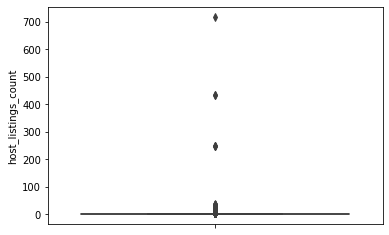

In [ ]:
#I will find identify the outliers for some of the features using boxplot
sns.boxplot(y=df['host_listings_count'])


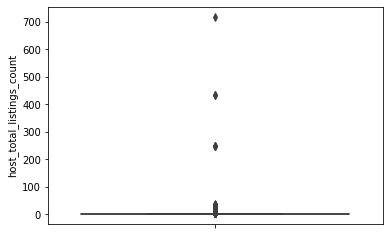

In [ ]:
sns.boxplot(y=df['host_total_listings_count'])

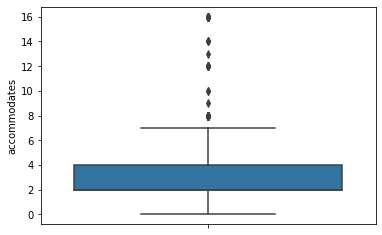

In [ ]:
sns.boxplot(y=df['accommodates'])

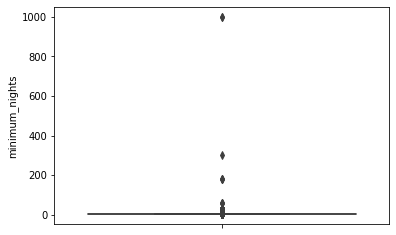

In [ ]:

sns.boxplot(y=df['minimum_nights'])

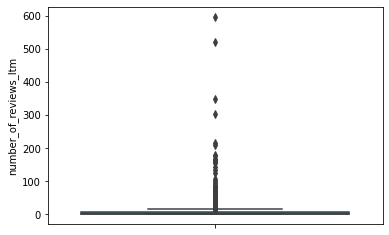

In [ ]:
sns.boxplot(y=df['number_of_reviews_ltm'])

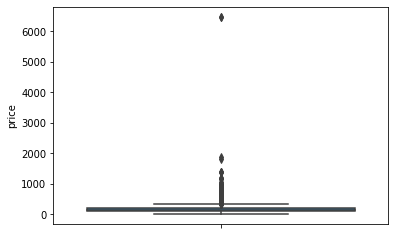

In [ ]:
sns.boxplot(y=df['price'])

In [ ]:
df['price'].dtype


dtype('float64')

# lets remove the outliers for the rest of our numerical columns

In [ ]:
numerics = ['int16', 'int32', 'int64','float64']


In [ ]:
def cap_data(df):
    for col in df.select_dtypes(include=numerics):
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df=cap_data(df)

capping the  host_listings_count
capping the  host_total_listings_count
capping the  latitude
capping the  longitude
capping the  accommodates
capping the  price
capping the  minimum_nights
capping the  maximum_nights
capping the  minimum_minimum_nights
capping the  maximum_minimum_nights
capping the  minimum_maximum_nights
capping the  maximum_maximum_nights
capping the  minimum_nights_avg_ntm
capping the  maximum_nights_avg_ntm
capping the  availability_30
capping the  availability_60
capping the  availability_90
capping the  availability_365
capping the  number_of_reviews
capping the  number_of_reviews_ltm
capping the  number_of_reviews_l30d
capping the  review_scores_rating


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  review_scores_accuracy
capping the  review_scores_cleanliness
capping the  review_scores_checkin
capping the  review_scores_communication
capping the  review_scores_location
capping the  review_scores_value
capping the  calculated_host_listings_count
capping the  calculated_host_listings_count_entire_homes
capping the  calculated_host_listings_count_private_rooms
capping the  calculated_host_listings_count_shared_rooms
capping the  reviews_per_month


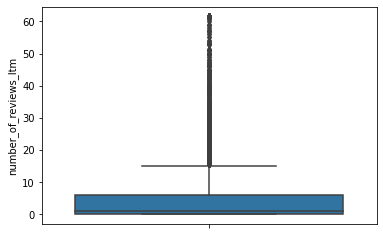

In [ ]:
#after removing the outliers
sns.boxplot(y=df['number_of_reviews_ltm'])


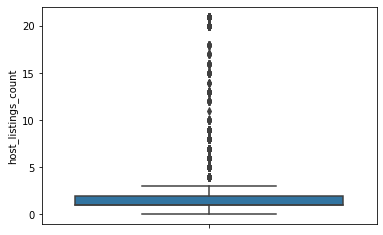

In [ ]:
sns.boxplot(y=df['host_listings_count'])


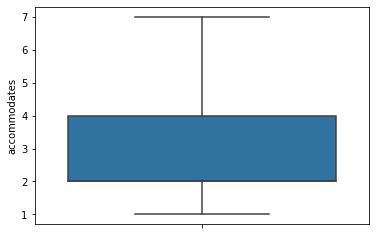

In [ ]:
sns.boxplot(y=df['accommodates'])

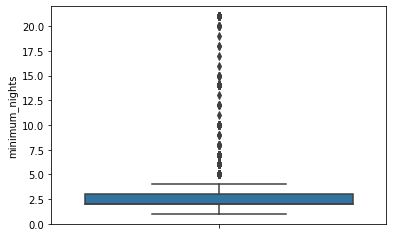

In [ ]:
sns.boxplot(y=df['minimum_nights'])

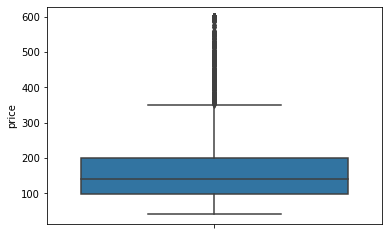

In [ ]:
sns.boxplot(y=df['price'])

# Data Visualization

### Plotting the most repeated words in 'name' column as an image using WordCloud and STOPWORDS packages in python

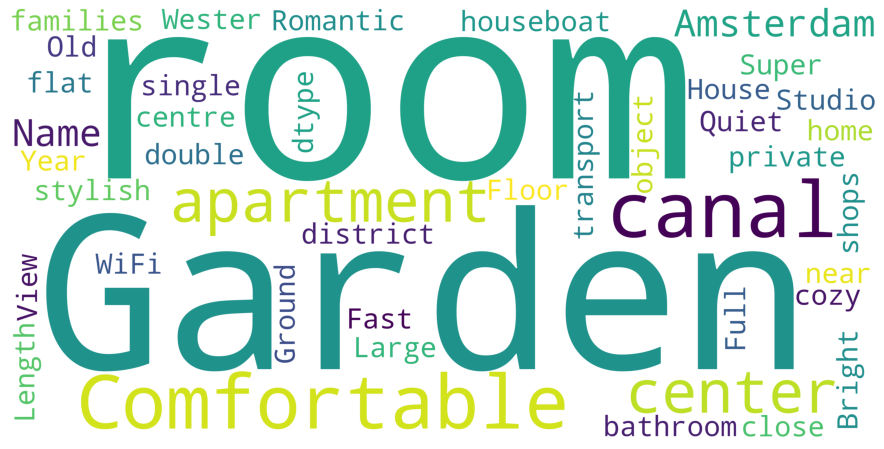

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

name_corpus = ''.join(str(df['name']))
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

##### The output above shows the most frequent number of words in listings "name" column which are including: Bathroom, Bedroom, Amestrdam etc. There are some words which specifically tell about AirBnb desription like: super, floor, Private, cozy, stylish, comfortable, etc . These are typical words for hosts when describing their listings.

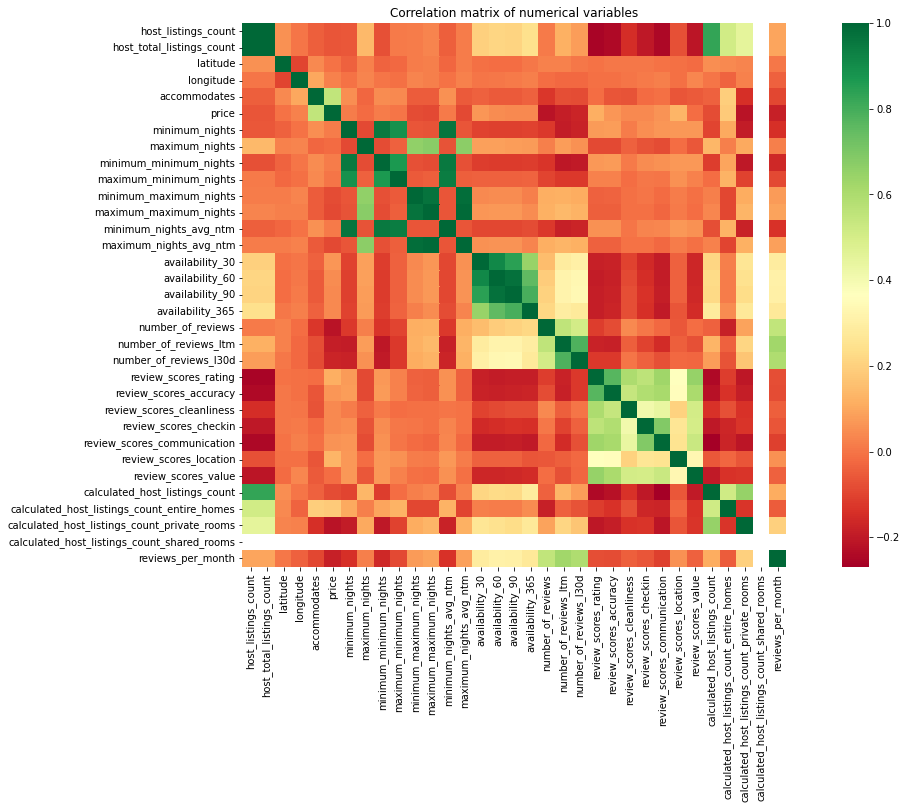

In [ ]:
# Correlation
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.title(title)
plt.ioff()

## the next graph is about the relationship between price and room type.

we observed that The Shared room price is always lower than 1000 dollars. On the other hand, the private room and the entire home have the highest price in some.

Text(0.5, 1.0, 'Room Type vs Price')

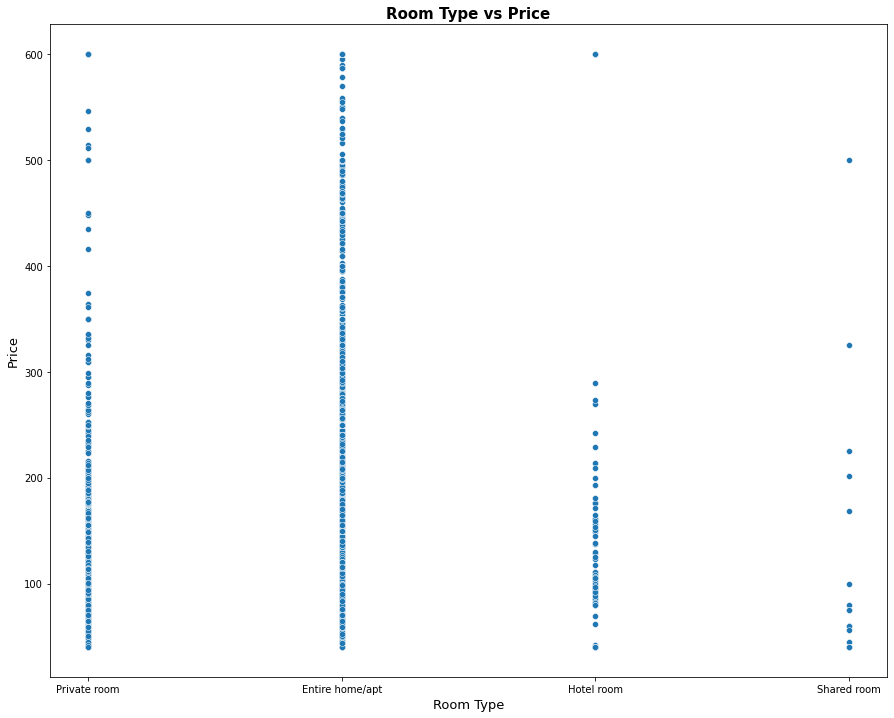

In [ ]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

# Let's encode our data

In [ ]:
df.dtypes

name                                             object
description                                      object
host_location                                    object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                               int64
host_total_listings_count                         int64
neighbourhood                                    object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        

In [ ]:
categ=df.select_dtypes (include= ['object'])

In [ ]:
categ

,name,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,beds,amenities,has_availability,first_review,last_review,license,instant_bookable
0,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Amsterdam, Noord-Holland, The Netherlands",100%,100%,t,Indische Buurt,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,Private room in rental unit,Private room,1.5 shared baths,1.0,2.0,"[""Extra pillows and blankets"", ""Dedicated work...",t,2013-08-25,2021-11-21,0363 5F3A 5684 6750 D14D,t
1,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,"Amsterdam, Noord-Holland, The Netherlands",100%,100%,f,Grachtengordel,"Amsterdam, North Holland, Netherlands",Centrum-Oost,Private room in townhouse,Private room,1 private bath,1.0,1.0,"[""Hangers"", ""Paid parking off premises"", ""Hair...",t,2014-01-17,2020-03-27,0363 CBB3 2C10 0C2A 1E29,t
2,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Amsterdam, Noord-Holland, The Netherlands",100%,100%,t,Westelijke Eilanden,"Amsterdam, North Holland, Netherlands",Centrum-West,Private room in houseboat,Private room,1.5 baths,1.0,1.0,"[""Luggage dropoff allowed"", ""Outdoor dining ar...",t,2013-02-17,2021-10-20,0363 974D 4986 7411 88D8,t
3,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Amsterdam, Noord-Holland, The Netherlands",100%,100%,t,Amsterdam Centrum,"Amsterdam, North Holland, Netherlands",Centrum-West,Private room in rental unit,Private room,1 shared bath,1.0,1.0,"[""Hangers"", ""Hair dryer"", ""Coffee maker"", ""Sha...",t,2015-05-18,2021-11-25,0363 607B EA74 0BD8 2F6F,f
4,Comfortable single room,This room can also accomodate 2 people. For a...,"Amsterdam, Noord-Holland, The Netherlands",100%,100%,t,Amsterdam Centrum,"Amsterdam, North Holland, Netherlands",Centrum-Oost,Private room in rental unit,Private room,1 shared bath,1.0,1.0,"[""Hangers"", ""Hair dryer"", ""Coffee maker"", ""Sha...",t,2014-04-08,2021-11-26,0363 607B EA74 0BD8 2F6F,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,apartment center Amsterdam,Relaxe neste espaÃ§o calmo e cheio de estilo.<...,BR,93%,25%,f,unknown,unknown,De Pijp - Rivierenbuurt,Entire rental unit,Entire home/apt,1 bath,2.0,2.0,"[""Long term stays allowed""]",t,4.68,2021-12-03,Exempt,t
5552,Full flat with garden for families near Wester...,Our flat is located just in front of the Weste...,"Amsterdam, North Holland, Netherlands",93%,25%,f,unknown,unknown,Bos en Lommer,Entire condominium (condo),Entire home/apt,1 bath,2.0,3.0,"[""Outdoor dining area"", ""Extra pillows and bla...",t,4.68,2021-12-03,0363 C724 A106 AE99 0B0B,t
5553,Ground Floor of a 200 Year Old Canal House,Centrally located canal house with modern faci...,NL,93%,25%,f,unknown,unknown,Centrum-West,Private room in condominium (condo),Private room,1 private bath,2.0,3.0,"[""Dishes and silverware"", ""Hangers"", ""Dining t...",t,4.68,2021-12-03,0363 8553 5196 A6A0 2A7F,f
5554,Bright and cozy apartment in Amsterdam,Welcome to my apartment located in West Amster...,"Amsterdam, North Holland, Netherlands",64%,25%,f,unknown,unknown,Bos en Lommer,Entire rental unit,Entire home/apt,1 bath,2.0,2.0,"[""Hot water kettle"", ""Washer"", ""Dishes and sil...",t,4.68,2021-12-03,0363 4E2B 7976 261A FF95,f


### label encoding

In [ ]:
# as the columns contains categorical values and we need numerical values so I use label encoding to make this
from sklearn.preprocessing import LabelEncoder



df_col=categ.columns
df=df.copy()
for i in range(len(df_col)):
  df[df_col[i]] = LabelEncoder().fit_transform(df[df_col[i]].astype(str))
df

,name,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3956,3351,8,2,2,1,17,1,1,29,...,4.98000,4.68,4.82,1412,1,1,0,1,0,2.83
1,4672,113,8,2,2,0,14,2,2,29,...,4.62000,4.87,4.49,3113,1,2,0,2,0,3.53
2,4091,3739,8,2,2,1,50,1,1,29,...,4.92000,4.90,4.80,2257,1,1,0,1,0,2.11
3,1458,308,8,2,2,1,0,2,2,29,...,4.94000,4.97,4.82,1432,0,2,0,2,0,4.63
4,1479,4558,8,2,2,1,0,2,2,29,...,4.91000,4.86,4.75,1432,0,2,0,2,0,5.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,5326,3392,12,42,16,0,53,0,0,51,...,4.88084,5.00,4.68,4399,1,1,1,0,0,4.68
5552,2192,3085,9,42,16,0,53,0,0,51,...,4.88084,5.00,4.68,3051,1,1,1,0,0,4.68
5553,2357,1145,109,42,16,0,53,0,0,51,...,4.88084,5.00,4.68,2021,0,1,0,1,0,4.68
5554,992,5059,9,20,16,0,53,0,0,51,...,4.88084,5.00,4.68,1145,0,1,1,0,0,4.68


In [ ]:
df['price']

0        60.0
1       106.0
2       135.0
3        75.0
4        55.0
        ...  
5551    120.0
5552    140.0
5553    200.0
5554    116.0
5555    600.0
Name: price, Length: 5556, dtype: float64

In [ ]:
df.describe()

,name,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,...,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.0,5556.000000
mean,2740.310835,2708.052376,24.597372,9.130310,33.489381,0.257199,36.799316,2.101332,2.101332,33.733261,...,4.888004,4.805466,4.651542,2503.112671,0.332253,2.169366,1.039597,0.884269,0.0,1.399028
std,1583.996581,1570.042014,37.798700,14.084812,34.979861,0.437130,17.297468,3.608569,3.608569,11.206905,...,0.177163,0.220431,0.248428,1397.022095,0.471064,3.089066,1.434517,2.001376,0.0,1.681448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,3.670000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.040000
25%,1367.750000,1350.750000,9.000000,2.000000,2.000000,0.000000,18.000000,1.000000,1.000000,27.000000,...,4.880000,4.690000,4.560000,1276.750000,0.000000,1.000000,0.000000,0.000000,0.0,0.310000
50%,2739.500000,2696.500000,9.000000,2.000000,16.000000,0.000000,40.000000,1.000000,1.000000,27.000000,...,4.950000,4.870000,4.680000,2550.500000,0.000000,1.000000,1.000000,0.000000,0.0,0.700000
75%,4110.250000,4070.250000,10.000000,2.000000,69.000000,1.000000,53.000000,2.000000,2.000000,51.000000,...,5.000000,5.000000,4.800000,3819.250000,1.000000,2.000000,1.000000,1.000000,0.0,1.830000
max,5484.000000,5418.000000,176.000000,48.000000,91.000000,1.000000,53.000000,21.000000,21.000000,51.000000,...,5.000000,5.000000,5.000000,4414.000000,1.000000,20.000000,9.000000,12.000000,0.0,8.570000


In [ ]:
df.shape

(5556, 53)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          5556 non-null   int64  
 1   description                                   5556 non-null   int64  
 2   host_location                                 5556 non-null   int64  
 3   host_response_rate                            5556 non-null   int64  
 4   host_acceptance_rate                          5556 non-null   int64  
 5   host_is_superhost                             5556 non-null   int64  
 6   host_neighbourhood                            5556 non-null   int64  
 7   host_listings_count                           5556 non-null   int64  
 8   host_total_listings_count                     5556 non-null   int64  
 9   neighbourhood                                 5556 non-null   i

# Q) Predict the price level for each listing.

In [ ]:
sorted_df = df.sort_values(by='price',ascending=False) #from highest to lowest

In [ ]:
sorted_df #from highest to lowest

,name,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5555,2691,5370,109,20,50,0,53,2,2,51,...,4.88084,5.00,4.68,4387,1,1,1,0,0,4.68
1195,780,5357,9,2,0,0,53,1,1,16,...,4.94000,4.56,4.56,522,0,1,1,0,0,0.28
3200,2072,4375,9,42,90,0,53,5,5,22,...,4.75000,5.00,4.25,4399,1,5,5,0,0,4.00
2063,5242,2062,9,0,11,0,14,1,1,27,...,4.88000,4.94,4.53,4060,0,1,1,0,0,0.71
3214,2758,2306,10,2,81,1,33,2,2,27,...,4.89000,5.00,4.68,2711,0,1,1,0,0,5.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,900,4562,10,2,2,1,53,2,2,51,...,4.94000,4.79,4.83,2129,1,2,0,2,0,3.94
3766,1679,3251,8,28,41,0,53,5,5,27,...,4.80000,4.00,4.00,4302,0,4,2,2,0,0.21
5460,846,3481,35,47,91,0,30,7,7,51,...,4.88084,5.00,4.68,4389,1,6,0,2,0,1.00
3753,2240,1812,35,47,91,0,30,7,7,27,...,4.67000,4.62,4.53,4399,1,6,0,2,0,8.57


In [ ]:
sorted_df['price']

5555    600.0
1195    600.0
3200    600.0
2063    600.0
3214    600.0
        ...  
2460     40.0
3766     40.0
5460     40.0
3753     40.0
4149     40.0
Name: price, Length: 5556, dtype: float64

In [ ]:
# since the dataset is ordered according to the price from the highest to the lowest
# I will get the highest 25% which means
# I will get the first (0.25*5556)
# which means I will get the first 1389 row
high_price=sorted_df.head(1389)


In [ ]:
high_price #those will have a high price level

,name,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5555,2691,5370,109,20,50,0,53,2,2,51,...,4.88084,5.00,4.68,4387,1,1,1,0,0,4.68
1195,780,5357,9,2,0,0,53,1,1,16,...,4.94000,4.56,4.56,522,0,1,1,0,0,0.28
3200,2072,4375,9,42,90,0,53,5,5,22,...,4.75000,5.00,4.25,4399,1,5,5,0,0,4.00
2063,5242,2062,9,0,11,0,14,1,1,27,...,4.88000,4.94,4.53,4060,0,1,1,0,0,0.71
3214,2758,2306,10,2,81,1,33,2,2,27,...,4.89000,5.00,4.68,2711,0,1,1,0,0,5.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2822,2883,10,22,2,0,10,1,1,27,...,4.98000,4.82,4.73,4389,0,1,1,0,0,0.69
360,2757,2286,10,2,0,0,53,0,0,27,...,4.93000,4.93,4.87,2189,0,1,1,0,0,0.45
386,2317,2196,9,2,2,0,53,1,1,27,...,5.00000,4.48,4.86,3445,0,1,1,0,0,0.34
1248,677,2602,10,17,80,1,30,2,2,27,...,4.93000,4.58,4.34,2503,0,1,1,0,0,1.40


In [ ]:
high_price['price']

5555    600.0
1195    600.0
3200    600.0
2063    600.0
3214    600.0
        ...  
515     200.0
360     200.0
386     200.0
1248    200.0
719     200.0
Name: price, Length: 1389, dtype: float64

In [ ]:
high_price['price_level']='High'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
high_price['price_level']

5555    High
1195    High
3200    High
2063    High
3214    High
        ... 
515     High
360     High
386     High
1248    High
719     High
Name: price_level, Length: 1389, dtype: object

In [ ]:
# for the rows between 25% and 75% percentage those will have medium price level
# I will get the first 75% and then I will drop the first 25% after that
# which means I will get the first (0.75*5556)which is 4167 row
highest_75_percentage=sorted_df.head(4167)

In [ ]:
highest_75_percentage

,name,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5555,2691,5370,109,20,50,0,53,2,2,51,...,4.88084,5.00,4.68,4387,1,1,1,0,0,4.68
1195,780,5357,9,2,0,0,53,1,1,16,...,4.94000,4.56,4.56,522,0,1,1,0,0,0.28
3200,2072,4375,9,42,90,0,53,5,5,22,...,4.75000,5.00,4.25,4399,1,5,5,0,0,4.00
2063,5242,2062,9,0,11,0,14,1,1,27,...,4.88000,4.94,4.53,4060,0,1,1,0,0,0.71
3214,2758,2306,10,2,81,1,33,2,2,27,...,4.89000,5.00,4.68,2711,0,1,1,0,0,5.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,2519,4659,109,2,2,0,34,1,1,27,...,5.00000,4.43,5.00,1105,1,1,0,1,0,1.42
3843,2229,4247,8,2,2,1,28,3,3,51,...,5.00000,4.85,4.80,2559,1,2,1,1,0,1.24
1580,4100,5362,9,2,2,0,44,1,1,27,...,4.94000,4.80,4.77,4309,1,1,0,1,0,1.98
1490,2396,1209,9,13,27,0,33,1,1,51,...,4.92000,4.83,4.65,3045,0,1,1,0,0,0.97


In [ ]:
# to get what's between 25% and 75%
#  I'll use tail function on highest_75_percentage variable
# to get the (4167-1389)= 2778 rows thats between 25% and 75%
medium_price = highest_75_percentage.tail(2778)

In [ ]:
medium_price

,name,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
94,147,662,8,2,51,0,33,1,1,29,...,4.66,4.62,4.32,815,0,1,1,0,0,0.61
712,4819,3227,9,11,53,0,33,1,1,27,...,4.93,4.81,4.69,1546,0,1,1,0,0,0.65
699,1862,923,10,2,2,1,10,2,2,29,...,5.00,4.83,4.61,3462,0,1,1,0,0,0.73
51,4813,304,8,2,85,0,14,0,0,51,...,4.85,4.89,4.70,782,0,3,2,1,0,0.54
425,1566,4697,10,2,2,1,15,1,1,29,...,4.86,4.70,4.61,4033,0,1,1,0,0,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,2519,4659,109,2,2,0,34,1,1,27,...,5.00,4.43,5.00,1105,1,1,0,1,0,1.42
3843,2229,4247,8,2,2,1,28,3,3,51,...,5.00,4.85,4.80,2559,1,2,1,1,0,1.24
1580,4100,5362,9,2,2,0,44,1,1,27,...,4.94,4.80,4.77,4309,1,1,0,1,0,1.98
1490,2396,1209,9,13,27,0,33,1,1,51,...,4.92,4.83,4.65,3045,0,1,1,0,0,0.97


In [ ]:
medium_price['price']

94      200.0
712     200.0
699     200.0
51      200.0
425     200.0
        ...  
2616     98.0
3843     98.0
1580     98.0
1490     98.0
2169     98.0
Name: price, Length: 2778, dtype: float64

In [ ]:
medium_price['price_level']='medium'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
medium_price['price_level']

94      medium
712     medium
699     medium
51      medium
425     medium
         ...  
2616    medium
3843    medium
1580    medium
1490    medium
2169    medium
Name: price_level, Length: 2778, dtype: object

In [ ]:
# to get the least 25% prices
#I'll use the tail function to get (0.25*5556)
# which means I will get the last 1389 row
low_price=sorted_df.tail(1389)

In [ ]:
low_price

,name,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4308,3410,2533,145,2,88,1,7,0,0,27,...,5.00000,4.64,4.59,4399,0,3,2,1,0,1.24
228,3141,306,8,2,2,0,33,2,2,51,...,4.83000,4.62,4.57,2768,0,1,0,1,0,1.66
5003,1586,86,9,2,2,0,53,0,0,51,...,5.00000,5.00,5.00,3248,0,1,1,0,0,0.40
489,594,418,10,45,2,0,53,5,5,36,...,4.31000,4.24,4.40,4399,1,6,0,1,0,0.90
490,596,417,10,45,2,0,53,5,5,36,...,4.59000,4.64,4.74,4399,1,6,0,1,0,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,900,4562,10,2,2,1,53,2,2,51,...,4.94000,4.79,4.83,2129,1,2,0,2,0,3.94
3766,1679,3251,8,28,41,0,53,5,5,27,...,4.80000,4.00,4.00,4302,0,4,2,2,0,0.21
5460,846,3481,35,47,91,0,30,7,7,51,...,4.88084,5.00,4.68,4389,1,6,0,2,0,1.00
3753,2240,1812,35,47,91,0,30,7,7,27,...,4.67000,4.62,4.53,4399,1,6,0,2,0,8.57


In [ ]:
low_price['price']

4308    98.0
228     98.0
5003    98.0
489     98.0
490     98.0
        ... 
2460    40.0
3766    40.0
5460    40.0
3753    40.0
4149    40.0
Name: price, Length: 1389, dtype: float64

In [ ]:
low_price['price_level']='Low'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
low_price['price_level']

4308    Low
228     Low
5003    Low
489     Low
490     Low
       ... 
2460    Low
3766    Low
5460    Low
3753    Low
4149    Low
Name: price_level, Length: 1389, dtype: object

In [ ]:
# now I will merge my low_price,high_price and medium_price datasets together
import pandas as pd
f_df = pd.concat([low_price, medium_price,high_price])

In [ ]:
f_df

,name,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_level
4308,3410,2533,145,2,88,1,7,0,0,27,...,4.64,4.59,4399,0,3,2,1,0,1.24,Low
228,3141,306,8,2,2,0,33,2,2,51,...,4.62,4.57,2768,0,1,0,1,0,1.66,Low
5003,1586,86,9,2,2,0,53,0,0,51,...,5.00,5.00,3248,0,1,1,0,0,0.40,Low
489,594,418,10,45,2,0,53,5,5,36,...,4.24,4.40,4399,1,6,0,1,0,0.90,Low
490,596,417,10,45,2,0,53,5,5,36,...,4.64,4.74,4399,1,6,0,1,0,0.80,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2822,2883,10,22,2,0,10,1,1,27,...,4.82,4.73,4389,0,1,1,0,0,0.69,High
360,2757,2286,10,2,0,0,53,0,0,27,...,4.93,4.87,2189,0,1,1,0,0,0.45,High
386,2317,2196,9,2,2,0,53,1,1,27,...,4.48,4.86,3445,0,1,1,0,0,0.34,High
1248,677,2602,10,17,80,1,30,2,2,27,...,4.58,4.34,2503,0,1,1,0,0,1.40,High


In [ ]:
f_df['price_level']

4308     Low
228      Low
5003     Low
489      Low
490      Low
        ... 
515     High
360     High
386     High
1248    High
719     High
Name: price_level, Length: 5556, dtype: object

In [ ]:
#price level column is ordered 
# I will shuffle my data 
from sklearn.utils import shuffle
f_df=shuffle(f_df)

In [ ]:
f_df

,name,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_level
2803,991,2265,7,2,2,0,18,1,1,51,...,4.80,4.56,3891,1,1,1,0,0,0.64,medium
882,4272,4759,10,26,70,0,41,4,4,27,...,4.70,4.55,1037,0,4,2,2,0,1.82,Low
2501,3515,2817,9,2,24,0,33,1,1,27,...,4.71,4.86,310,0,1,1,0,0,0.16,medium
2087,4611,5379,109,2,58,0,5,1,1,27,...,4.55,4.59,3012,0,2,0,2,0,0.63,Low
574,4102,3997,9,0,58,0,18,1,1,29,...,4.78,4.04,2275,0,1,1,0,0,0.29,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,646,2800,9,26,36,0,10,2,2,51,...,4.96,4.37,889,0,2,1,0,0,0.75,medium
1828,3745,2900,109,2,88,1,53,3,3,51,...,4.94,4.58,1134,0,1,0,1,0,0.65,Low
2101,2310,3659,10,26,2,1,10,1,1,27,...,4.98,4.91,2176,1,1,1,0,0,1.06,medium
4818,5038,4560,9,2,91,0,53,6,6,27,...,4.88,4.31,2017,1,6,0,6,0,1.94,medium


In [ ]:
f_df['price_level']

2803    medium
882        Low
2501    medium
2087       Low
574     medium
         ...  
2497    medium
1828       Low
2101    medium
4818    medium
2297      High
Name: price_level, Length: 5556, dtype: object

# Now f_df is the data to work on in my classification problem

In [ ]:
X=f_df.drop(columns='price_level', axis=1)
y=f_df['price_level']

In [ ]:
X

,name,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2803,991,2265,7,2,2,0,18,1,1,51,...,4.88,4.80,4.56,3891,1,1,1,0,0,0.64
882,4272,4759,10,26,70,0,41,4,4,27,...,4.88,4.70,4.55,1037,0,4,2,2,0,1.82
2501,3515,2817,9,2,24,0,33,1,1,27,...,5.00,4.71,4.86,310,0,1,1,0,0,0.16
2087,4611,5379,109,2,58,0,5,1,1,27,...,4.87,4.55,4.59,3012,0,2,0,2,0,0.63
574,4102,3997,9,0,58,0,18,1,1,29,...,4.70,4.78,4.04,2275,0,1,1,0,0,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,646,2800,9,26,36,0,10,2,2,51,...,4.89,4.96,4.37,889,0,2,1,0,0,0.75
1828,3745,2900,109,2,88,1,53,3,3,51,...,4.95,4.94,4.58,1134,0,1,0,1,0,0.65
2101,2310,3659,10,26,2,1,10,1,1,27,...,4.98,4.98,4.91,2176,1,1,1,0,0,1.06
4818,5038,4560,9,2,91,0,53,6,6,27,...,4.63,4.88,4.31,2017,1,6,0,6,0,1.94


In [ ]:
y

2803    medium
882        Low
2501    medium
2087       Low
574     medium
         ...  
2497    medium
1828       Low
2101    medium
4818    medium
2297      High
Name: price_level, Length: 5556, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=50)
X_train.shape, X_test.shape

((3333, 53), (2223, 53))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV

# A) Decision Tree Classifier
## Hyper parameter optimization

In [ ]:
#Setting values for the parameters
tree = DecisionTreeClassifier()
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyperT = dict(max_depth = max_depth, min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf, max_features=max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridT = GridSearchCV(tree, hyperT, cv = 3, verbose = 1, n_jobs = -1)
bestT = gridT.fit(X_train, y_train)


Fitting 3 folds for each of 400 candidates, totalling 1200 fits


In [ ]:
#Printing the best hyperparameters
print('The best hyper parameters are: \n',gridT.best_params_)

The best hyper parameters are: 
 {'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


#  Fitting Descision Tree with best Hyper parameters

In [ ]:
#Fitting the decision tree model with the best hyper parameters obtained through GridSearchCV
tree1 = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=10, min_samples_leaf=5,min_samples_split=5, max_features=10)
tree1.fit(X_train,y_train)
pred_tree1 = tree1.predict(X_test)

In [ ]:
#Checking different metrics for decision tree model after tuning the hyperparameters
print('Checking different metrics for decision tree model after tuning the hyperparameters:\n')
print("Training accuracy: ",tree1.score(X_train,y_train))
acc_score = accuracy_score(y_test, pred_tree1)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_tree1)


Checking different metrics for decision tree model after tuning the hyperparameters:

Training accuracy:  0.6912691269126913
Testing accuracy:  0.5906432748538012


# Q) Predict the price of each listing. 

#Machine Learning Models
Evaluation Metrics

The parameter R² will measure how good the model can explain the price, that is, how good the model is. The closer to 100%, the better.

The Mean Square Error shows how much the machine learning model is wrong. The smaller the error, the better.

In [ ]:
def evaluate_model(name_model, y_test, forecast):
    r2 = r2_score(y_test, forecast)
    RSME = np.sqrt(mean_squared_error(y_test, forecast))
    return f'Modelo {name_model}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

It will be tested the following models:

RandomForest

LinearRegression

Extra Tree

In [ ]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [ ]:
model_rf = RandomForestRegressor()
model_lr = LinearRegression()
model_et = ExtraTreesRegressor()

models = {'RandomForest': model_rf,
          'LinearRegression': model_lr,
          'ExtraTrees': model_et,
          }

XX=df.drop(columns='price', axis=1)
yy=df['price']

In [ ]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, random_state=10)

for name_model, model in models.items():
    model.fit(XX_train, yy_train)
    forecast = model.predict(XX_test)
    print(evaluate_model(name_model, yy_test, forecast))

Modelo RandomForest:
R²:55.13%
RSME:66.71
Modelo LinearRegression:
R²:46.42%
RSME:72.90
Modelo ExtraTrees:
R²:55.43%
RSME:66.49


# The best model is the Extra Trees Regressor, which was the model with higher R² and lowest RSME.

# Q) a hypothesis test question:Whether the people who rent listings equal to or less than 100 dollar are more satisfied comparing to those who rented listings higher than 100 dollar? 

## To compare the level of satisfaction you can use the mean value of review scores in the listings table.

In [ ]:
#to get the average of the 'review_scores_rating'
df['review_scores_rating'].mean()

4.825242260619131

alternative :  the people who rent listings equal to or less than 100 dollar are more satisfied comparing to those who rented listings higher than 100 dollar

null :  the people who rent listings equal to or less than 100 dollar are less satisfied comparing to those who rented listings higher than 100 dollar


In [ ]:
from scipy import stats
ttest,percentage = stats.ttest_1samp(df[(df['price'] <= 100)].review_scores_rating, 4.825)
print('statistic= ', ttest,'pvalue= ', percentage)
if percentage<0.05:
  print("Accept Alternative Hypothesis, Reject null hypothesis")
else:
  print("Accept null hypothesis, Reject Alternative Hypothesis")

statistic=  -9.251930652263226 pvalue=  6.712459862121562e-20
Accept Alternative Hypothesis, Reject null hypothesis
